In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [7]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
from sklearn.preprocessing import  StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
import warnings

In [2]:
url= 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv'

In [3]:
df= pd.read_csv(url)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df['Age'] = df['Rings']+1.5
df = df.drop('Rings', axis =1)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Univariate analysis

In [8]:
df.shape

(4177, 9)

In [10]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


Data has all the numerical features except the Sex column/

In [12]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

<AxesSubplot:>

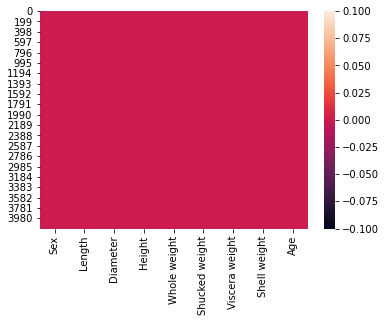

In [17]:
sns.heatmap(df.isnull())

Data has no null value

In [13]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


Data is not normaly distributed

In [14]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Age                 28
dtype: int64

In [15]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [16]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])

In [20]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


Lets check the Skewness

In [21]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Age               1.114102
dtype: float64

As we can see all the columns are having skewness except sex column

<AxesSubplot:xlabel='Sex', ylabel='count'>

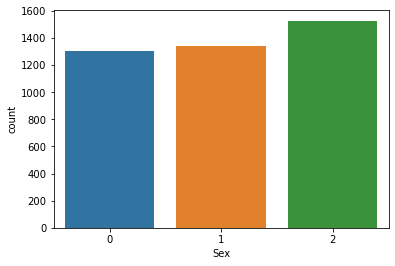

In [22]:
sns.countplot(x=df['Sex'])

By the above graph we can see the data is slightly imbalance between the sex

In [35]:
# Sex Ratio in Abalone

print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
2    0.365813
1    0.321283
0    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
2    1528
1    1342
0    1307
Name: Sex, dtype: int64


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Age'>

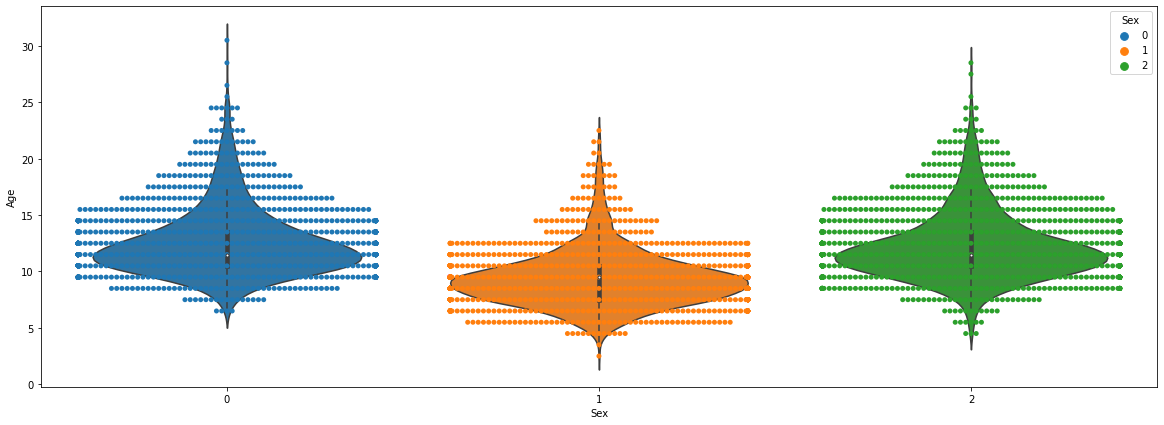

In [36]:
# Sex and Age Visulization

plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

By the Violin plot graph we can se that approx:- 

Male : Majority Between 7.5 to 19

Female : Majority Between 8 to 19

Infant : Majority Between 6 to 10

Lets check the correlation between the data

In [23]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

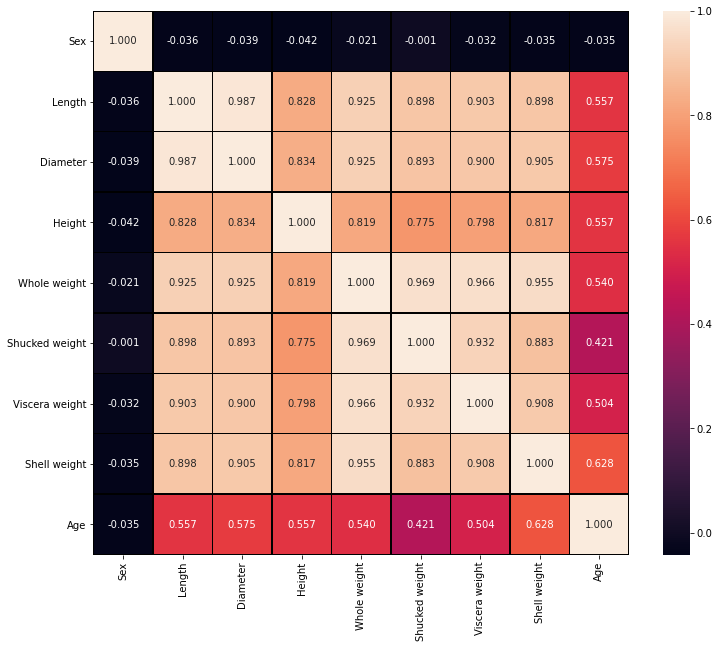

In [24]:
fig,ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(), annot = True ,linewidth =.5 , linecolor ='black' , fmt= '.3f')

By the correlation and heatmap we can see that Sex column is very less correlated to the Age (target) column

In [25]:
columns = df.iloc[:,:-1].columns
columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

Lets check the distribution of the data using histplot

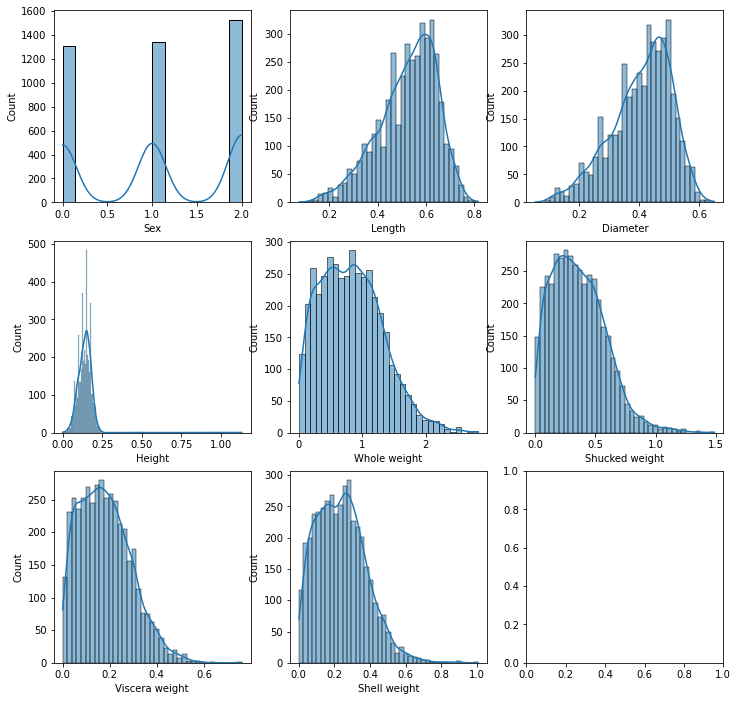

In [26]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(df[i],kde=True,ax=ax[row,col])
    col += 1

Lets check the outliers using boxplot.

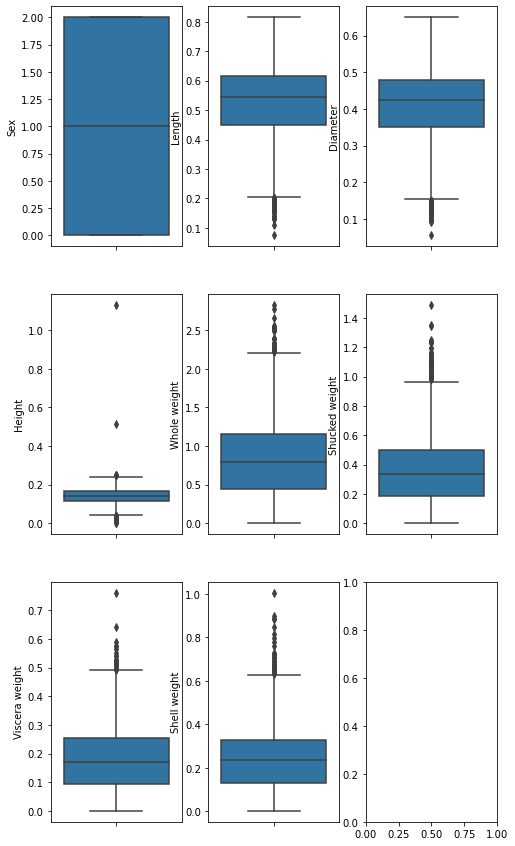

In [33]:
fig,ax = plt.subplots(3,3,figsize=(8,15))
row = col = 0
for n,i in enumerate(columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.boxplot(y=df[i],ax=ax[row,col])
    col += 1
plt.show()

By the histograms and box plots we can see that the data has both outliers and skewness. So we have to remove skewness and outliers both.

# Multivariate Analysis

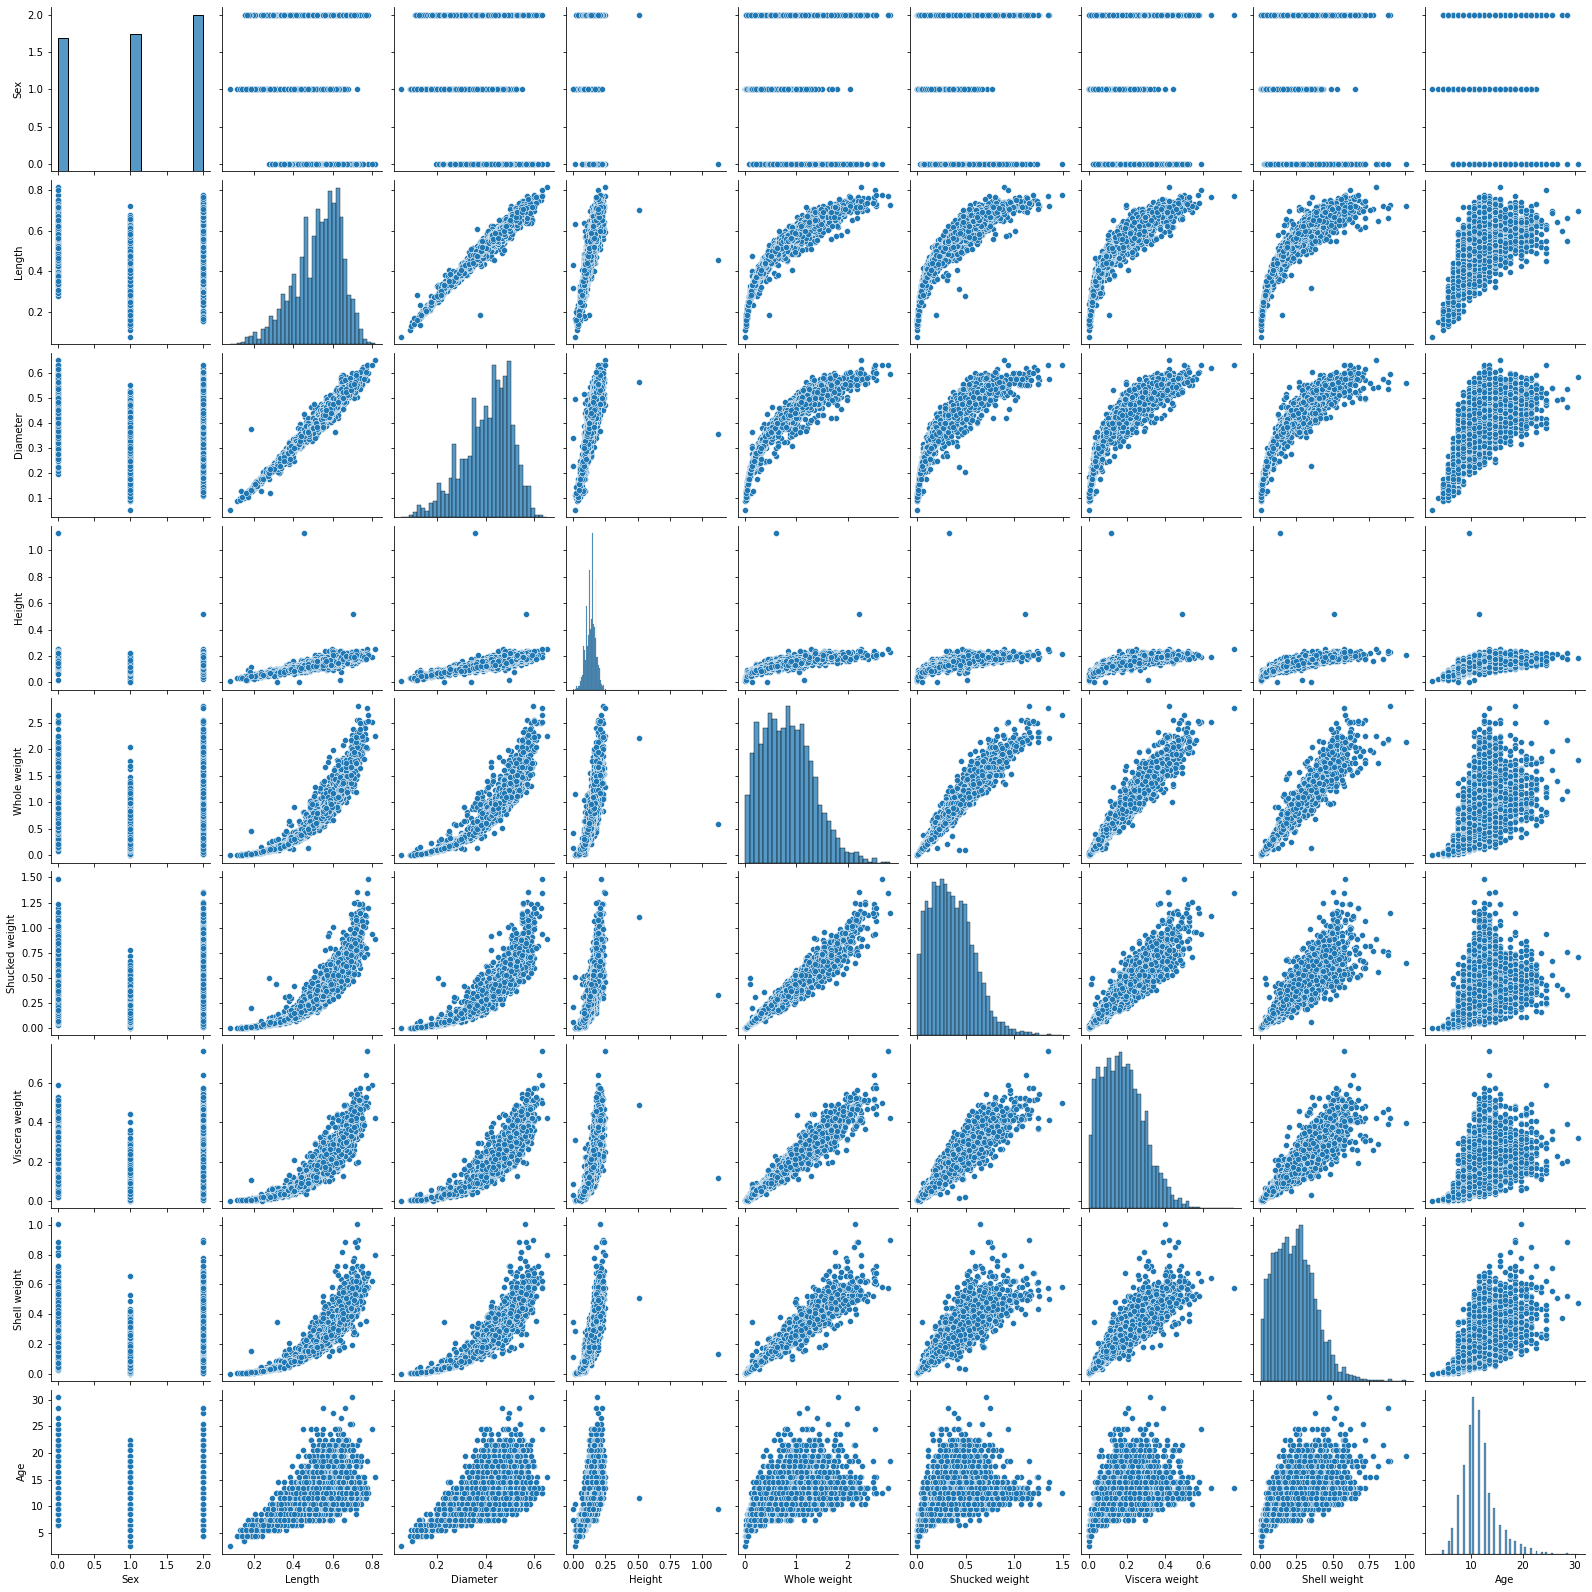

In [37]:
sns.pairplot(df)

In [38]:
df.shape

(4177, 9)

lets remove the skewness and outliers

In [39]:
df.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,10.5


In [41]:
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

z= np.abs(zscore(df))
df1 = df[(z<3).all(axis=1)]

In [42]:
df1.shape

(4027, 9)

In [49]:
data_loss =(4177-4027)/4177*100
data_loss

3.5910940866650707

As the data loss is less than 6 percent so we can remove the ouliers

Now lets remove the skewness from the data

In [50]:

pt = PowerTransformer()

df2 = pt.fit_transform(df1.iloc[:,:-1])
df2 =pd.DataFrame(df2, columns = df1.iloc[:,:-1].columns)
df2.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.134329,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354
1,1.134329,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717
2,-1.313068,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214
3,1.134329,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533
4,-0.008746,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926


In [52]:
df2.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

All the skewness has been removed

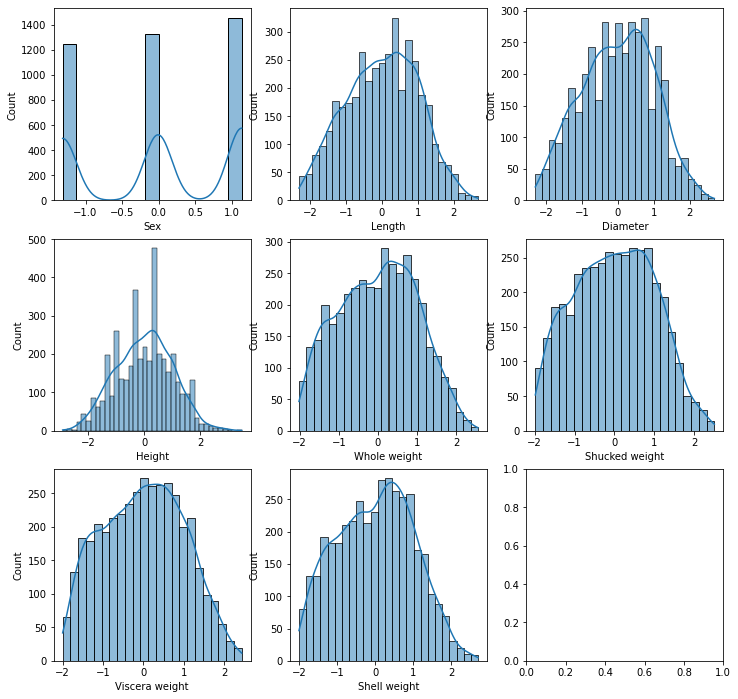

In [53]:
fig,ax = plt.subplots(3,3,figsize=(12,12))
row = col = 0
for n,i in enumerate(columns):
    if (n%3 == 0) & (n > 0):
        row += 1
        col = 0
    sns.histplot(df2[i],kde=True,ax=ax[row,col])
    col += 1